# Palmer Penguins Group Project: Ashley Chang / Akshita Saxena

The goal of this group project is to take one qualitative and two quantitative features of a penguin in order to predict its species. We need to figure out which features to select, and use those features to create machine learning models that can accurately predict a penguin's species.

# 1. Group Contributions Statement

Our team consists of two members: `Ashley Chang` and `Akshita Saxena`. Ashley created the data tables and histograms, split and cleaned the data, and worked on the random forests model. Akshita created the boxplots and worked on the neural network model. Both of us imported and prepared the data, worked on feature selection and decision regions, and wrote explanations. We also helped each other on parts that we were stuck on. The work was distributed evenly between us, and no problems arose.

# 2. Data Import and Cleaning
### 2.1 Data Import

First, we import the necessary modules. We will be using `numpy`, `pandas`, `matplotlib (pyplot)`, `seaborn`, and `warnings` for our data preparation.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Next, we import the palmer penguins dataset. We'll shorten the `Species` names to its first word only and remove one of the penguins with a `.` as their `Sex`.

In [2]:
penguins = pd.read_csv("palmer_penguins.csv")
penguins["Species"] = penguins["Species"].str.split().str.get(0)
penguins = penguins[penguins['Sex'] != '.']
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


# 3. Exploratory Data Analysis

We want to ensure that we are not using unnecessary features. With a total of 17 columns, we can cut the dataframe down to the columns (features) that are most relevant for our goal. Looking at the columns, we can eliminate features that don't particularly relate to what species a penguin might be.

`studyName`, `Sample Number`, `Individual ID`, `Stage`, `Clutch Completion`, `Date Egg`, `Delta 15N and 13C`, and `Comments` are moreso related to the penguin species as a whole or for data organization purposes. These will most likely not help us predict the species of a penguin.

Therefore, the features we will look at are `Sex`, `Island`, `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, `Body Mass (g)`. These features are related to the penguins and seem like they differ for each species.

We will create a `summary` dataframe with the aforementioned features with their median, and group them based on their `Species`, `Sex`, and `Island`.

In [3]:
cols = ["Species", "Sex", "Island", "Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"]
penguins = penguins[cols]
summary = penguins.groupby(["Species", "Sex", "Island"]).aggregate([np.median])
summary

Culmen Length (mm) Culmen Depth (mm)  \
                                       median            median   
Species   Sex    Island                                           
Adelie    FEMALE Biscoe                 37.75             17.70   
                 Dream                  36.80             17.80   
                 Torgersen              37.60             17.45   
          MALE   Biscoe                 40.80             18.90   
                 Dream                  40.25             18.65   
                 Torgersen              41.10             19.20   
Chinstrap FEMALE Dream                  46.30             17.65   
          MALE   Dream                  50.95             19.30   
Gentoo    FEMALE Biscoe                 45.50             14.25   
          MALE   Biscoe                 49.50             15.70   

                           Flipper Length (mm) Body Mass (g)  
                                        median        median  
Species   Sex    Island                                       
Adelie    FEMALE Biscoe                  187.0        3375.0  
                 Dream                   188.0        3400.0  
                 Torgersen               189.0        3400.0  
          MALE   Biscoe                  191.0        4000.0  
                 Dream                   190.5        3987.5  
                 Torgersen               195.0        4000.0  
Chinstrap FEMALE Dream                   192.0        3550.0  
          MALE   Dream                   200.5        3950.0  
Gentoo    FEMALE Biscoe                  212.0        4700.0  
          MALE   Biscoe                  221.0        5500.0

This table presents median characteristics of male and female penguins of a particular species, on a particular island. It allows us to see the penguin features that are most distinct amongst the species.

We have two qualitative features: `Sex` and `Island`. We are able to see that Chinstrap penguins are found only on the island of Dream, Gentoo is only found on Biscoe, and Adelie can be found on any of the three represented islands. Thus, `Island` may be a qualitative feature that we can use to predict a penguin's species.

We have four quantitative features: `Culmen Length (mm)`, `Culmen Depth (mm)`, `Flipper Length (mm)`, and `Body Mass (mm)`. As it may be hard to immediately point out differences, we'll use histograms and bar plots to help visualize the differences.

(None, <matplotlib.legend.Legend at 0x7ff2014fb250>)

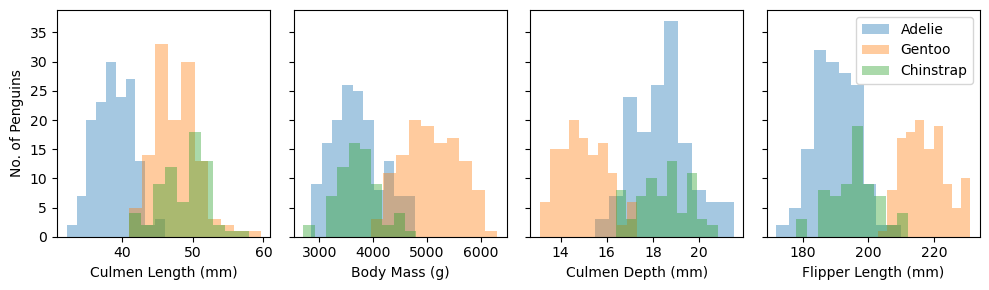

In [4]:
# create subplots
fig, ax = plt.subplots(1, 4, figsize = (10, 3), sharey = True)

# set y-axis label
ax[0].set(ylabel = "No. of Penguins")
quantitativeFeatures = ["Culmen Length (mm)", "Body Mass (g)", "Culmen Depth (mm)", "Flipper Length (mm)"]

# loop through each quantitative feature
for i in range(0, len(quantitativeFeatures)):
    # loop through each species
    for species in list(set(penguins["Species"])):
        # create a histogram of the quantitative features for that species
        df = penguins[penguins["Species"] == species]
        ax[i].hist(df[quantitativeFeatures[i]], label = species, alpha = 0.4)
        # set x-axis label
        ax[i].set(xlabel = quantitativeFeatures[i])

plt.tight_layout(), plt.legend()

We created four histograms, one for each quantitative feature of a penguin. In each histogram, we plotted the values of each of the three species.

For `Culmen Length (mm)`, Adelie seems to be quite distinct from the other two species (the other two overlap, while Adelie mainly is on its own). For `Body Mass (g)`, Gentoo is the most distinct. For `Culmen Depth (mm)`, many Adelie penguins seem to have a high value in Culmen Depth. For `Flipper Length (mm)`, Gentoo is the most distinct.

Based on our observations, we could use `Culmen Length (mm)` to distinguish Adelie, while `Body Mass (g)`, `Culmen Depth (mm)`, and `Flipper Length (mm)` might be good choices to distinguish Gentoo.

We will use bar plots to confirm our observations.

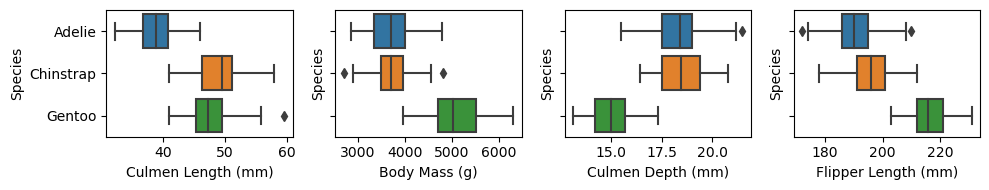

In [5]:
# create subplots
fig, ax = plt.subplots(1, 4, figsize = (10, 2), sharey = True)
quantitativeFeatures = ["Culmen Length (mm)", "Body Mass (g)", "Culmen Depth (mm)", "Flipper Length (mm)"]

# loop through each quantitative feature
for i in range(0, len(quantitativeFeatures)):
        # create a box plot for each species
        sns.boxplot(data = penguins, x = quantitativeFeatures[i], y = "Species", ax=ax[i], dodge=False)
        # set x-axis label
        ax[i].set(xlabel = quantitativeFeatures[i])

plt.tight_layout()

These boxplots show more clearly the median and spread of the data. Just like above, `Culmen Length (mm)` seems to be the best choice for distinguishing Adelie, as they are the most distinct from the other species. `Body Mass (g)`, `Culmen Depth (mm)`, and `Flipper Length (mm)` show Gentoo as being quite distinct from the others.

### 2.2 Cleaning

However, we want to be accurate and decide which 1 qualitative and 2 quantitative features would best work with our models. One method is `Systematic Feature Selection`, and in order to begin the process, we need to split and clean our data. One part of the dataset will be used for training our data, while the other part will be used for testing the data.

We first set our seed to 1111 so that it can generate the same random output from our code, even after multiple executions. We'll then import some modules that are necessary for this section from `sklearn`.

In [6]:
np.random.seed(1111)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

Now, let's split our data into a train and test dataset. We'll set our `test_size` to 0.2, as 80% of our data will be for training, and 20% will be for testing.

In [7]:
train, test = train_test_split(penguins, test_size = 0.2)

We wrote a function to clean our data. It transforms all values under `Species`, `Island`, and `Sex` into integers. Here, we will drop the `Species` column from our `X`, as it'll make handling our data easier for us later on. The `Species` will still be recorded in `y`.

In [8]:
def clean_penguins_data(data_df):
    '''
    Input: dataframe
    Turns existing qualitative columns into numerical values.
    Returns X, the dataframe with "cleaned" columns (numerical values)
    with "Species" dropped,
    and y, the "Species" column.
    '''
    df = data_df.copy().dropna() # Drop NaN values
    le = preprocessing.LabelEncoder()
    df['Species'] = le.fit_transform(df['Species'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Sex'] = le.fit_transform(df['Sex'])
    
    X = df.drop(['Species'], axis = 1)
    y = df['Species']
    
    return(X, y)

In [9]:
X_train, y_train = clean_penguins_data(train)
X_test,  y_test  = clean_penguins_data(test)

It is important to note that `LabelEncoder()` works to map integers to strings in sort order (alphabetically for strings). Therefore, for `Species`, `0 = Adelie`, `1 = Chinstrap`, and `2 = Gentoo`.

# 4. Feature Selection

Now we can start the process of `Systematic Feature Selection`. This process involves going through all possible combinations and checking its `cross validation score`, in which the highest score will be the combination we chose. 

We wrote a function called `check_column_score` that takes columns (our features) and tests its CV score.

In [10]:
def check_column_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    print("training with columns " + str(cols))

    LR = LogisticRegression(solver = 'liblinear')
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean() 

We then created a list of all possible combinations of 1 qualitative and 2 quantitative features and recorded it in `combos`. Then, we iterated through each combination and checked its CV score.

In [11]:
# list of all possible combinations of 1 qualitative, 2 quantitative features
combos =[['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
         ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
         ['Island', 'Culmen Length (mm)', 'Body Mass (g)'],
         ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
         ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
         ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
         ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
         ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
         ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
         ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
         ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)'],
         ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']]

# loop through each combination in combos
for cols in combos: 
    # evaluate CV score
    x = check_column_score(cols)
    print("CV score is " + str(np.round(x, 3)))

training with columns ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.955
training with columns ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.868
training with columns ['Island', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.86
training with columns ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.777
training with columns ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.781
training with columns ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.691
training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.951
training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.845
training with columns ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.868
training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.785
training with columns ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.7

As shown above, the combination with the highest CV score is `['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']` with a CV score of `0.955`. `['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']` was quite close, with a CV score of `0.951`! It was surprising, as our team did not consider `Sex` to be a useful qualitative feature.

We will use `Island`, `Culmen Length (mm)`, and `Culmen Depth (mm)` as our 1 qualitative and 2 quantitative features. We create new train and test sets with our features in mind. Our target feature is `Species`.

In [12]:
X_train1 = X_train[["Island", "Culmen Length (mm)", "Culmen Depth (mm)"]]
y_train1 = y_train

X_test1 = X_test[["Island", "Culmen Length (mm)", "Culmen Depth (mm)"]]
y_test1 = y_test

# 5. Modeling

We will now begin the process of using machine learning models to predict the species.

### Model 1 - Neural Network

Our first machine learning model is the `Neural Network`.

Let's first import some important, useful modules for this model from `sklearn`.

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### Cross-validation to choose complexity parameters

Our model complexity determines how accurately our machine learning model can predict unseen data. Therefore, we need to choose parameters that will serve our model best. We'll use the process of `cross-validation` to choose our complexity parameters.

Since our model is `neural networks`, we will be working with `MLPClassifier`. Our target complexity parameter is `hidden_layer_sizes` / the number of neurons in a layer.

We wrapped up our code to choose complexity parameters + graph into a function, so that it can be reused for our second machine learning model.

In [14]:
def choose_complexity_parameters(modelType):
    '''
    Input: model type, either Neural Network or Random Forests.
    
    Creates a plot of each complexity paramter value from 1 to 100 with an increment of 10,
    based on the model type.
    Scores the complexity parameter value against its CV score and chooses the best value.
    '''
    # create subplot
    fig, ax = plt.subplots(1)

    # set 0 as starting value
    best_score = 0

    # select model type and evaluate
    for v in range(1, 100, 10):
        if modelType == "Neural Network":
            M = MLPClassifier(solver = "adam",
                           alpha = 1e-4, 
                           hidden_layer_sizes = (v, v),
                           random_state = 0)
        elif modelType == "Random Forests":
            M = RandomForestClassifier(n_estimators = v)

        # check cross-validation score (10-fold)
        cv_score = cross_val_score(M, X_train1, y_train1, cv=10).mean()
        ax.scatter(v, cv_score, color = "black")
        # set best_score as the current cv_score and best_value as current v if highest
        if cv_score > best_score:
            best_value = v
            best_score = cv_score

    # set title, x-axis label, and y-axis label based on model type
    if modelType == "Neural Network":
        l = ax.set(title = "Best Value : " + str(best_value),
                   xlabel = "Number of neurons in layer", 
                   ylabel = "CV Score")
    elif modelType == "Random Forests":
        l = ax.set(title = "Best Estimator : " + str(best_value),
                   xlabel = "Estimator", 
                   ylabel = "CV Score")

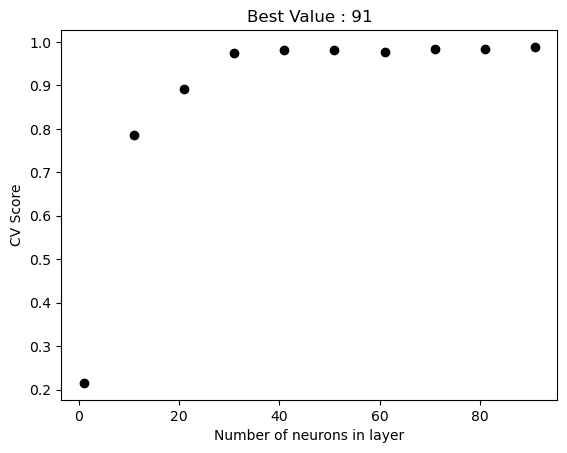

In [15]:
choose_complexity_parameters("Neural Network")

The best value outputted is 91, however the CV scores begin to stabilize around 50. We will use `50` as our complexity parameter for the neural network model.

### Evaluation on unseen testing data

We will use our new `hidden_layer_sizes` complexity parameter value and train our `Neural Network` machine learning model. We fit it with our training data. Then, after scoring our model against the test dataset, we obtain a score of around `97.06%`.

In [16]:
nn = MLPClassifier(solver = "adam",
                   alpha = 1e-4, 
                   hidden_layer_sizes = (50, 50),
                   random_state = 0)

nn.fit(X_train1, y_train1)
nn.score(X_test1, y_test1)

0.9705882352941176

### Confusion Matrix

It seems like our model isn't 100% accurate, so let's see where our model is making mistakes. We take the predictions that our model is making against the test data and create a `confusion matrix` that maps out what species we are predicting vs what it actually is supposed to be.

In [17]:
def make_confusionMatrix(model):
    '''
    Input: model type, either Neural Network or Random Forests
    
    Creates a confusion matrix of the selected model by predicting the training data against the testing data.
    Prints the accuracy and displays the confusion matrix.
    '''
    # predict labels with the testing dataset
    y_pred = model.predict(X_test1)
    # print accuracy of the prediction
    print('Accuracy: %.4f' % accuracy_score(y_test1, y_pred))
    # create a confusion matrix
    cm = pd.DataFrame(confusion_matrix(y_test1, y_pred),
                        index = ['Actual ' + str(int(i)) for i in np.unique(y_train1)],
                        columns = ['Predicted ' + str(int(i)) for i in np.unique(y_train1)])
    print('Confusion Matrix:')
    display(cm)

In [18]:
make_confusionMatrix(nn)

Accuracy: 0.9706
Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,34,0,0
Actual 1,1,9,1
Actual 2,0,0,23


From our confusion matrix above, it made two mistakes. The first mistake was predicting `Chinstrap (1)` as `Adelie (0)`. The second was predicting `Chinstrap (1)` as `Gentoo (2)`. Everything else seems correct!

### Decision Regions

Let's see how our model is doing in plot form. One useful method is creating `decision regions`, which shows how our model is predicting data and creating decision boundaries to separate our data points into labels. We'll create a decision regions plot for each value of our qualitative feature, with its x and y-axes being our two quantitative features. Our data points will be the penguins, and our model will attempt to classify each penguin's data point into their correct target feature, `Species`.

In [19]:
def plot_decision_regions(c):
    '''
    Input: takes in a model type.
    
    Creates a decision region of the model for all possible values of our qualitative feature,
    with the x and y being the two quantitative features. All three penguin species are plotted.
    
    Showcases multiple decision region plots with correct axis labeling and legend.
    '''
    le = preprocessing.LabelEncoder()
    
    # unique values of "Island"
    uniqueIslands = penguins["Island"].unique()
    
    # iterate through the keys in our dictionary
    for i in uniqueIslands:
        x0 = penguins['Culmen Length (mm)']
        x1 = penguins['Culmen Depth (mm)']
        y = le.fit_transform(penguins['Species'])

        # filter out NaN values from y
        x0 = x0[~np.isnan(y)]
        x1 = x1[~np.isnan(y)]
        y = y[~np.isnan(y)]

        # create a grid
        grid_x = np.linspace(x0.min(),x0.max(),501)
        grid_y = np.linspace(x1.min(),x1.max(),501)
        xx, yy = np.meshgrid(grid_x, grid_y)

        XX = xx.ravel()
        YY = yy.ravel()
        XY = np.c_[XX, YY]

        p = c.predict(XY)
        p = p.reshape(xx.shape)

        # create the plot
        fig, ax = plt.subplots(1)

        # use contour plot to visualize the predictions
        ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.2)

        # plot the data
        scatter = ax.scatter(x0, x1, c = y, cmap = "jet")

        ax.set(title = i,
               xlabel = "Culmen Length (mm)", 
               ylabel = "Culmen Depth (mm)")

        # creating a legend    
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Species")
        ax.add_artist(legend1)

        plt.show()

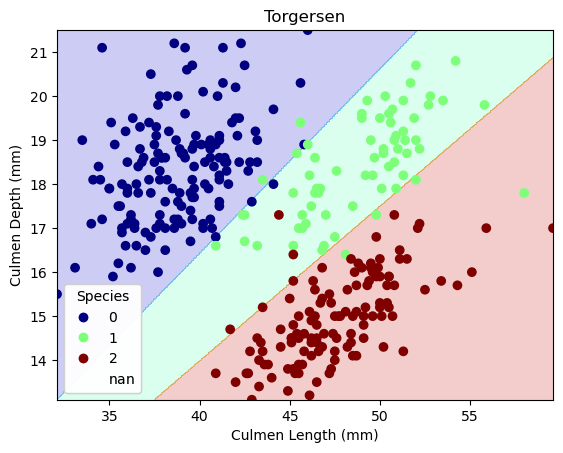

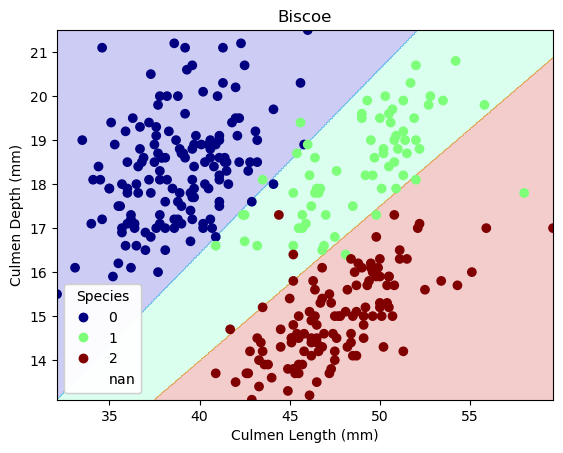

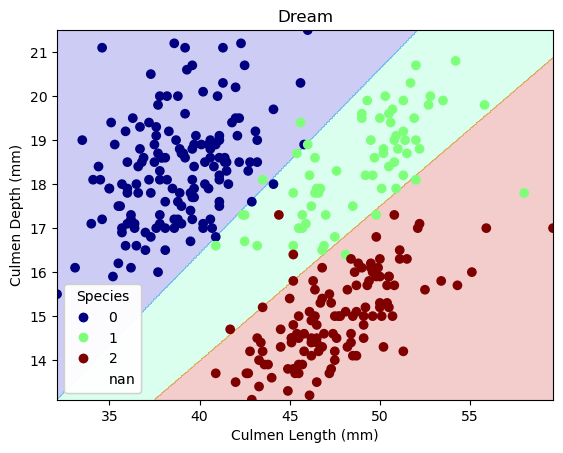

In [20]:
# drop "Island" from our training dataset
X_traindr = X_train1.drop(["Island"], axis = 1)

# fit against our neural network model
nn.fit(X_traindr, y_train1)

# show decision region
plot_decision_regions(nn)

Species

`0 - Adelie`

`1 - Chinstrap`

`2 - Gentoo`

### Findings

Our decision regions show that our model makes mistakes when classifying `Adelie (0)` as `Chinstrap (1)`, `Chinstrap (1)` as `Gentoo (3)`, and `Gentoo (3)` as `Chinstrap (2)`. It makes sense that the model makes mistakes-- for example, when classifying `Chinstrap (1)`, a lot of points that are truly `Chinstrap (1)` lie along or near decision boundaries. Our model needs work in terms of being more exact and precise with its boundaries, as many of our points have gotten mixed up.

Let's try a different machine learning model.

### Model 2 - Random Forests

Our second machine learning model is `Random Forests`.

Let's import an important module for this model from `sklearn`.

In [21]:
from sklearn.ensemble import RandomForestClassifier

### Cross-validation to choose complexity parameters

As aforementioned, we'll need to choose our complexity parameters again for our new model. 

Since our model is `random forests`, we will be working with `RandomForestClassifier`. Our target complexity parameter is `n_estimators`.

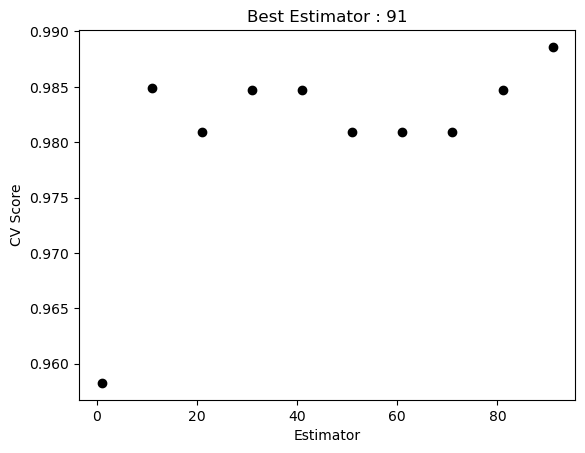

In [22]:
choose_complexity_parameters("Random Forests")

As shown above, the best `n_estimator` value is `91`.

### Evaluation on unseen testing data

We will use our new `n_estimator` complexity parameter value and train our `Random Forests` machine learning model. We fit it with our training data. Then, after scoring our model against the test dataset, we obtain a score of around `98.53%`.

In [23]:
rf = RandomForestClassifier(n_estimators = 91)
rf.fit(X_train1, y_train1)
rf.score(X_test1, y_test1)

0.9852941176470589

### Confusion Matrix

Our model is a bit more accurate than the previous model, but it is still making mistakes somewhere! Let's create a `confusion matrix` to see what our model is inaccurately predicting.

In [24]:
make_confusionMatrix(rf)

Accuracy: 0.9853
Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,33,0,1
Actual 1,0,11,0
Actual 2,0,0,23


From our confusion matrix above, it seems like it was predicting an `Adelie (0)` penguin as `Gentoo (2)`. Everything else was correctly predicted!

### Decision Regions

Let's plot decision regions for our `Random Forests` model as well. Since our accuracy was higher and the model is making fewer mistakes, we're expecting to see a model with more accurate boundaries.

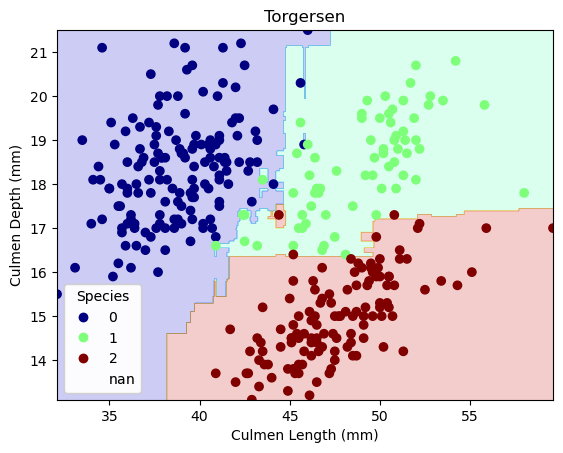

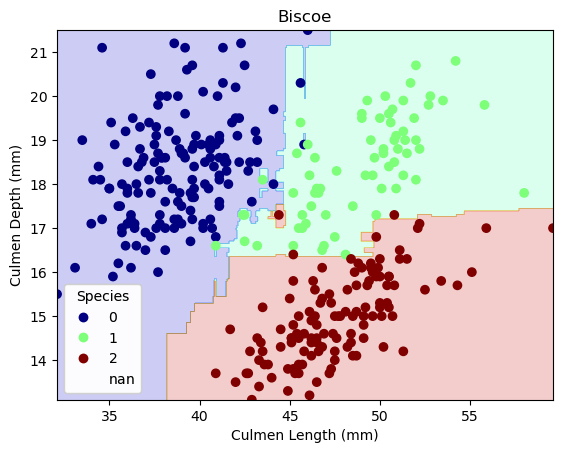

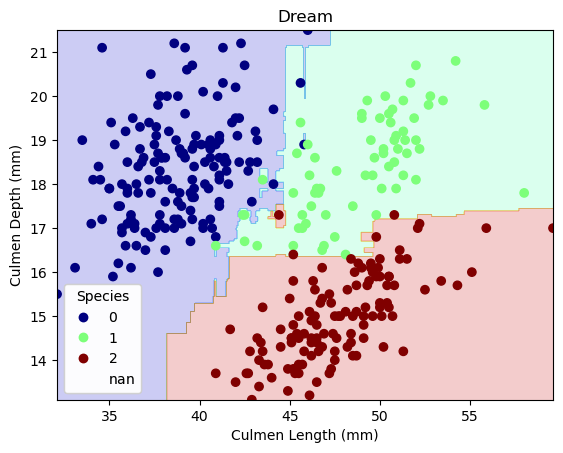

In [25]:
rf.fit(X_traindr, y_train1)
plot_decision_regions(rf)

Species

`0 - Adelie`

`1 - Chinstrap`

`2 - Gentoo`

### Findings

Our decision regions plot this time is a lot more exact than our neural networks decision regions plot. With its boundaries being a lot more precise, the model makes fewer mistakes. There are points that are on the edge/boundary but are classified as the correct species nevertheless. Our accuracy for this plot is much better than the previous ML model!

# Discussion

Overall, the models predicted a penguin's species accurately most of the time. The `neural network model` predicted the species correctly in about `97.06%` of cases, while the `random forest classifier` did even better at `98.53%`. There were only 2 mistakes made by the neural network model and 1 made by the random forest classifier model. Comparing the two models, we would recommend the `random forest classifier model`, using the features `Island`, `Culmen Length`, and `Culmen Depth`. 

The model could possibly be further refined if we trained it on at least one more feature, for example `Body Mass (g)` or `Flipper Length (mm)`, though we would need to test and see if using all four or more features would result in a higher CV score (sometimes, less features might be more effective!). Alternatively, had such data been available, using other bodily features that are more distinct between all three species could have also improved model performance. Lastly, a surefire way to improve performance would be to feed our model even more data! After all, obtaining more data is very important in machine learning, as models learn from data! :)